In [ ]:
!pip install torch torchaudio transformers diffusers soundfile Pillow huggingface_hub -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade diffusers transformers -q

In [ ]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")
pipe = pipe.to("cpu")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import torchaudio
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from diffusers import StableDiffusionPipeline # Import StableDiffusionPipeline from diffusers
import torch
import matplotlib.pyplot as plt

# ... (rest of your code) ...

# Step 1: Convert Audio to Text

# Load speech-to-text model
asr_processor = Wav2Vec2Processor.from_pretrained("openai/whisper-base")
asr_model = Wav2Vec2ForCTC.from_pretrained("openai/whisper-base")

# Load audio file
audio_file = "/content/audio1.mp3"  # Upload your audio file here
speech, rate = torchaudio.load(audio_file)

# Resample if needed
if rate != 16000:
    resampler = torchaudio.transforms.Resample(rate, 16000)
    speech = resampler(speech[0]).numpy()
else:
    speech = speech[0].numpy()

# Process audio to text
input_values = asr_processor(speech, return_tensors="pt", sampling_rate=16000).input_values
logits = asr_model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = asr_processor.decode(predicted_ids[0])

print("Transcription: ", transcription)

# Step 2: Generate Image from Text

# Load Stable Diffusion model for image generation
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")
pipe = pipe.to("cpu")  # Use CPU instead of GPU

# Generate image using the transcribed text
prompt = transcription
image = pipe(prompt).images[0]

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()

You are using a model of type whisper to instantiate a model of type wav2vec2. This is not supported for all configurations of models and can yield errors.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at openai/whisper-base and are newly initialized: ['encoder.layer_norm.bias', 'encoder.layer_norm.weight', 'encoder.layers.0.attention.k_proj.bias', 'encoder.layers.0.attention.k_proj.weight', 'encoder.layers.0.attention.out_proj.bias', 'encoder.layers.0.attention.out_proj.weight', 'encoder.layers.0.attention.q_proj.bias', 'encoder.layers.0.attention.q_proj.weight', 'encoder.layers.0.attention.v_proj.bias', 'encoder.layers.0.attention.v_proj.weight', 'encoder.layers.0.feed_forward.intermediate_dense.bias', 'encoder.layers.0.feed_forward.intermediate_dense.weight', 'encoder.layers.0.feed_forward.output_dense.bias', 'encoder.layers.0.feed_forward.output_dense.weight', 'encoder.layers.0.final_layer_norm.bias', 'encoder.layers.0.final_layer_norm.weight', 'enco

Transcription:  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (173 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!']


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")
pipe = pipe.to("cpu")  # Use CPU instead of GPU

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import torchaudio
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch

# Load pre-trained model and processor - Changed model ID to one designed for speech-to-text
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Load audio file
audio_file = "/content/audio1.mp3"  # Upload your audio file here
speech, rate = torchaudio.load(audio_file)

# Resample if needed
resampler = torchaudio.transforms.Resample(rate, 16000)
speech = resampler(speech[0]).numpy()

# Process audio to text
input_values = processor(speech, return_tensors="pt", sampling_rate=16000).input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.decode(predicted_ids[0])

print("Transcription: ", transcription)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Transcription:  FOREST WITH DALL TREES AND A GENT AND STREAM FLOWING


In [ ]:
from transformers import pipeline

# Text completion model - Use a specific pre-trained model like 'gpt2'
text_generator = pipeline("text-generation", model="gpt2")

# Enhance the prompt
enhanced_prompt = text_generator(transcription, max_length=50, num_return_sequences=1)[0]['generated_text']
print("Enhanced Prompt: ", enhanced_prompt)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Enhanced Prompt:  FOREST WITH DALL TREES AND A GENT AND STREAM FLOWING THE CIGARS

For those who want to live in peace, or to know when some of them are going to die, you can try to get some


In [ ]:
from diffusers import StableDiffusionPipeline

# Load the text-to-image model - Changed model ID to a valid one
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.to("cuda")

# Generate image
image = pipe(enhanced_prompt).images[0]

# Display the image
image.show()

# Save the image
image.save("generated_image.png")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [ ]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:242: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
Keyword arguments {'use_auth_token': 'your_hugging_face_auth_token', 'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

Enhanced Prompt:  FOREST WITH TALL TREES AND A GENTLE STREAM FLOWING IN FOUNTAIN WEST.


RENAMEING BAY - TOWN EATERS

LIVE AT 6:00 PM.





  0%|          | 0/35 [00:00<?, ?it/s]

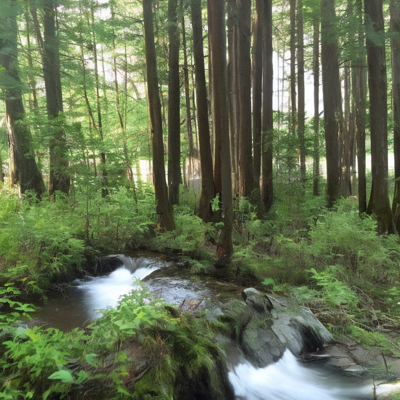

In [ ]:
print("Enhanced Prompt: ", enhanced_prompt)
generate_image(enhanced_prompt, image_gen_model)